# Detektor krawędzi Canny’ego (Canny edge detector)

Filter Canny’ego to wielofazowy detektor krawędzi. Korzysta on z filtru bazowanego na pochodnej filtru Gaussowskiego w celu obliczenia intensywności gradientu. Filtr Gaussa redukuje efekty szumu w obrazie. Następnie, potencjalne krawędzie są sprowadzane do grubości 1 piksela oraz usuwane bądź zostawiane korzystając z histerezy i progowania na podstawie wielkości gradientu.

Filtr Canny’ego korzysta z trzech parametrów: szerokość filtru Gaussa (im więcej szumu ma obraz - tym większa szerokość filtru), minimalny i maksymalny próg histerezy.


<IPython.core.display.Javascript object>


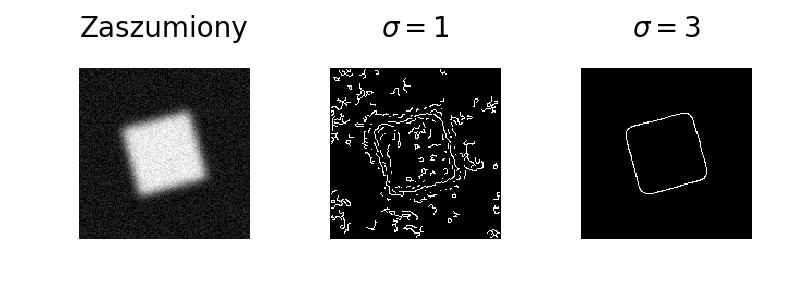

In [2]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Wygenerowanie zaszumionego obrazu kwadratu
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Obliczenie filtru Canny’ego dla dwóch wartości sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# Prezentacja rezultatów
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, 
    figsize=(8, 3), 
    sharex=True, sharey=True
)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Zaszumiony', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('$\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('$\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()